## Importing

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)


## EDA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bgrogers/knn_example/main/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


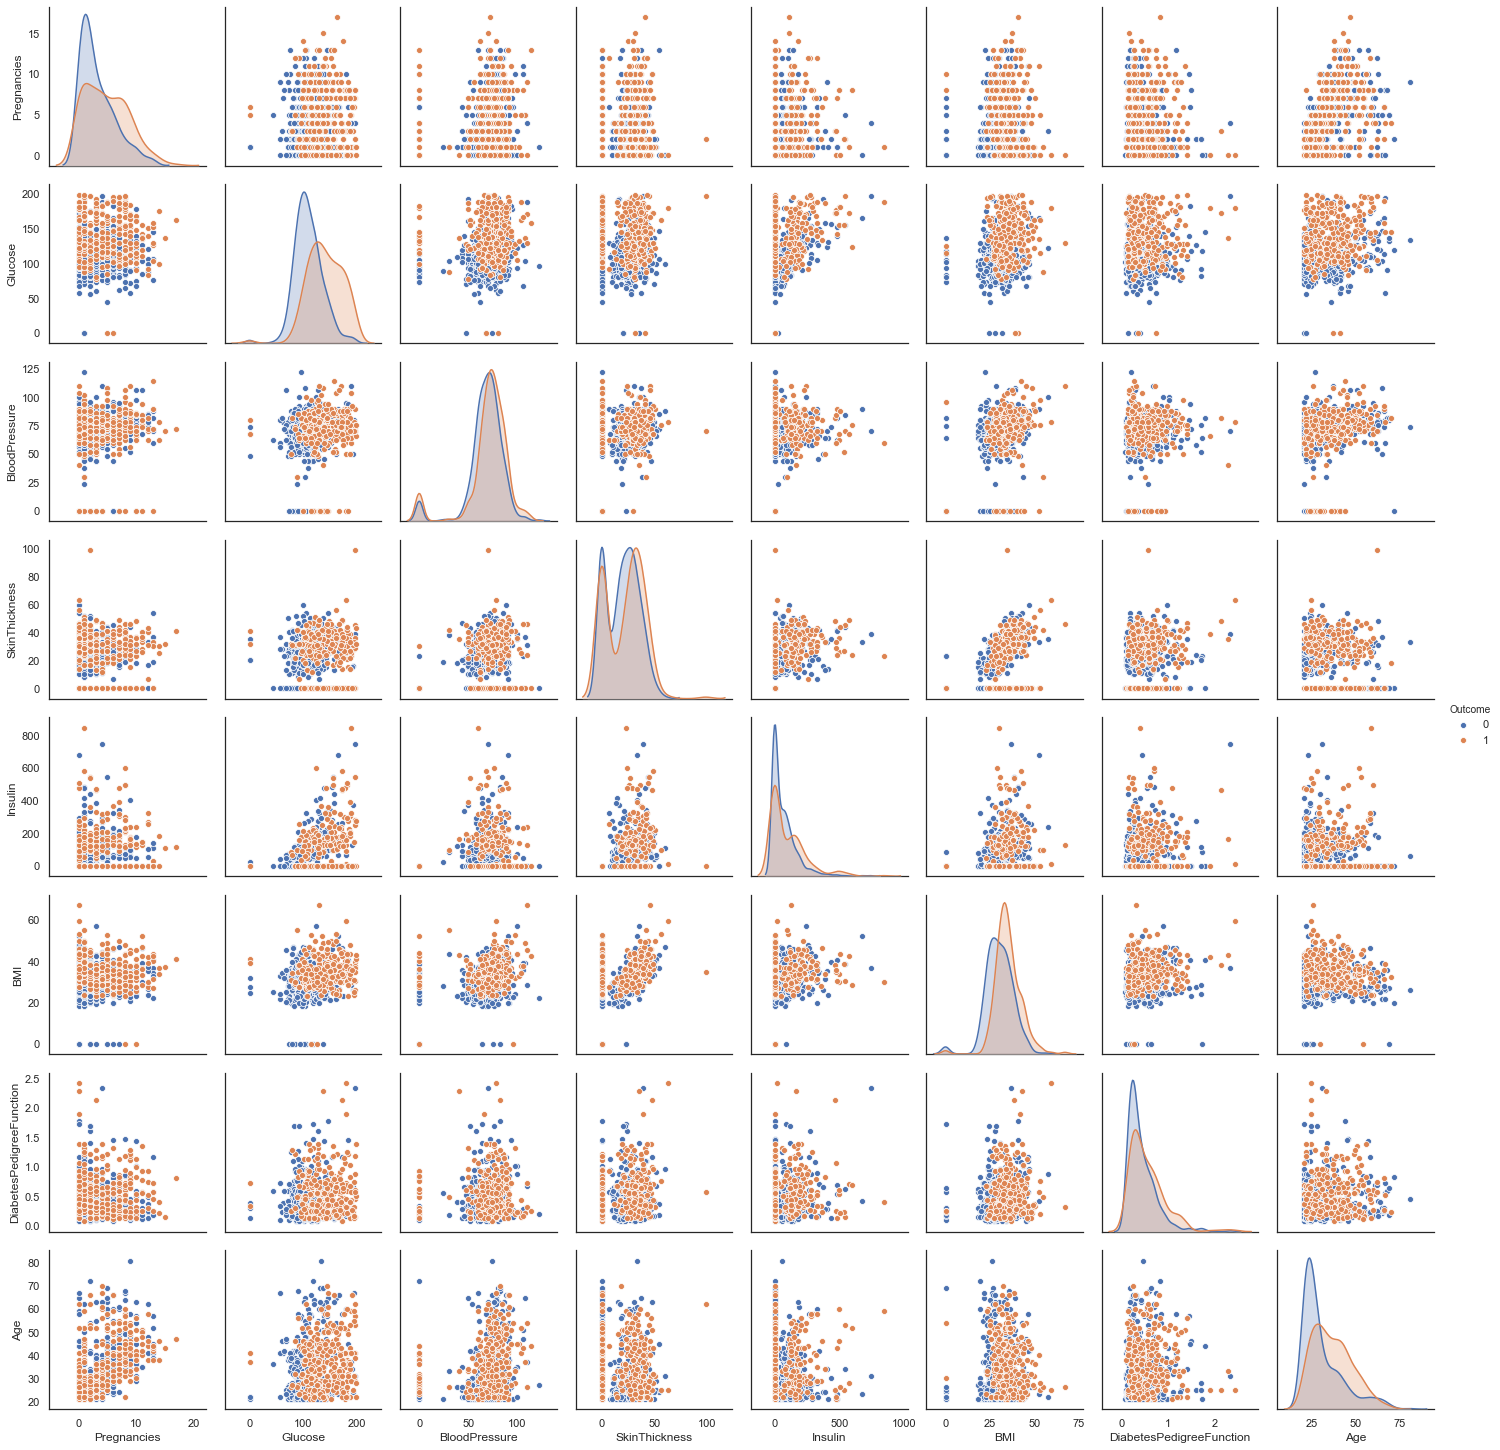

In [6]:

sns.pairplot(df, hue = 'Outcome')
plt.show()

In [7]:
df2 = df.copy(deep = True)
df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df2.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


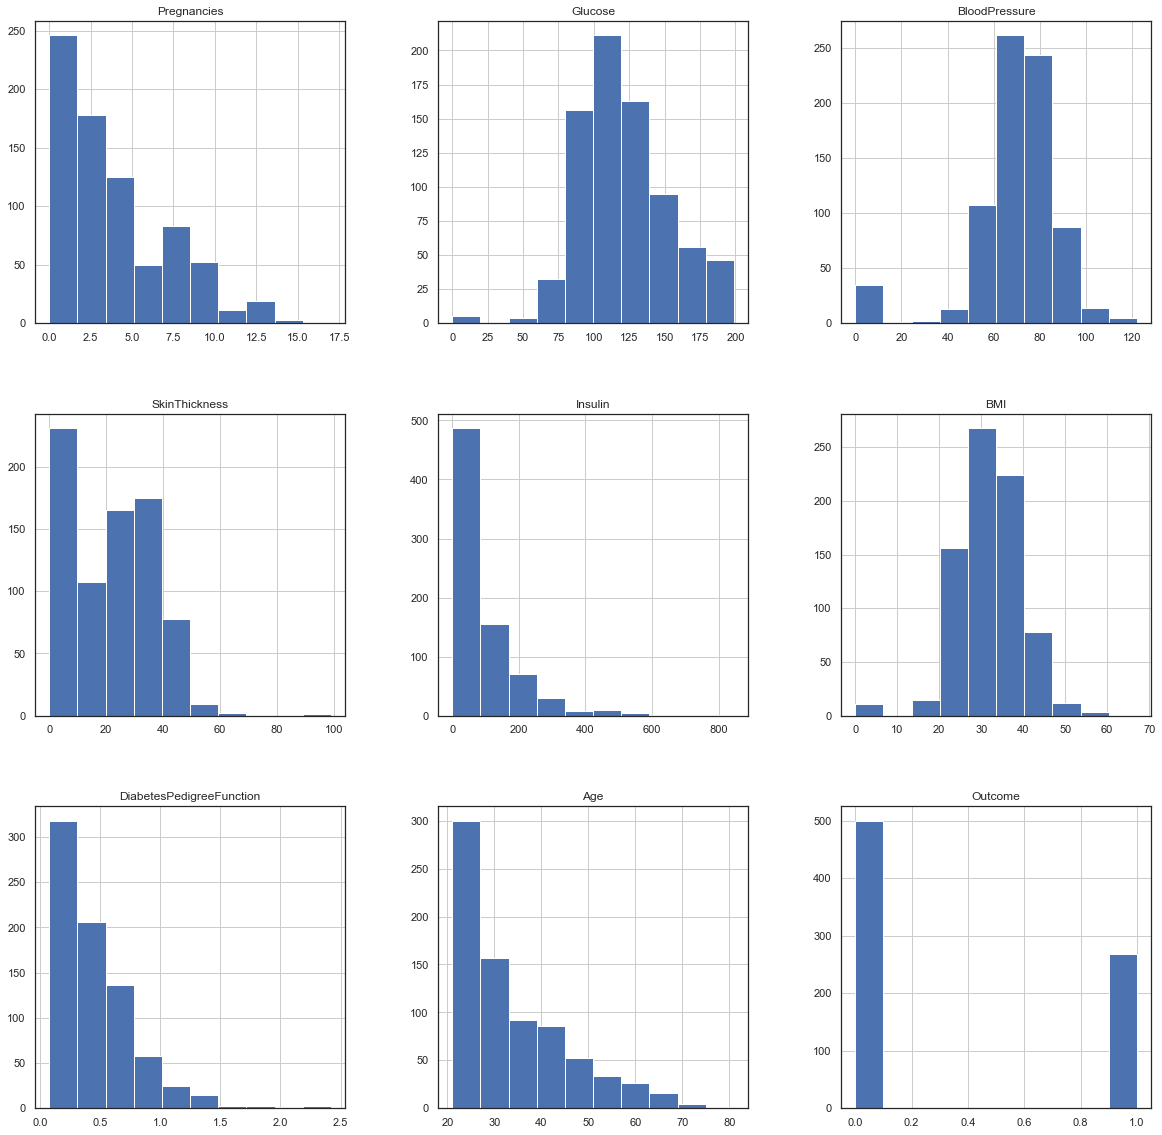

In [8]:
p = df.hist(figsize = (20,20))

## Data Cleaning (Replacing null values with either Mean or Median)

In [9]:
df2['Glucose'].fillna(df2['Glucose'].mean(), inplace = True)
df2['BloodPressure'].fillna(df2['BloodPressure'].mean(), inplace = True)
df2['SkinThickness'].fillna(df2['SkinThickness'].median(), inplace = True)
df2['Insulin'].fillna(df2['Insulin'].median(), inplace = True)
df2['BMI'].fillna(df2['BMI'].mean(), inplace = True)

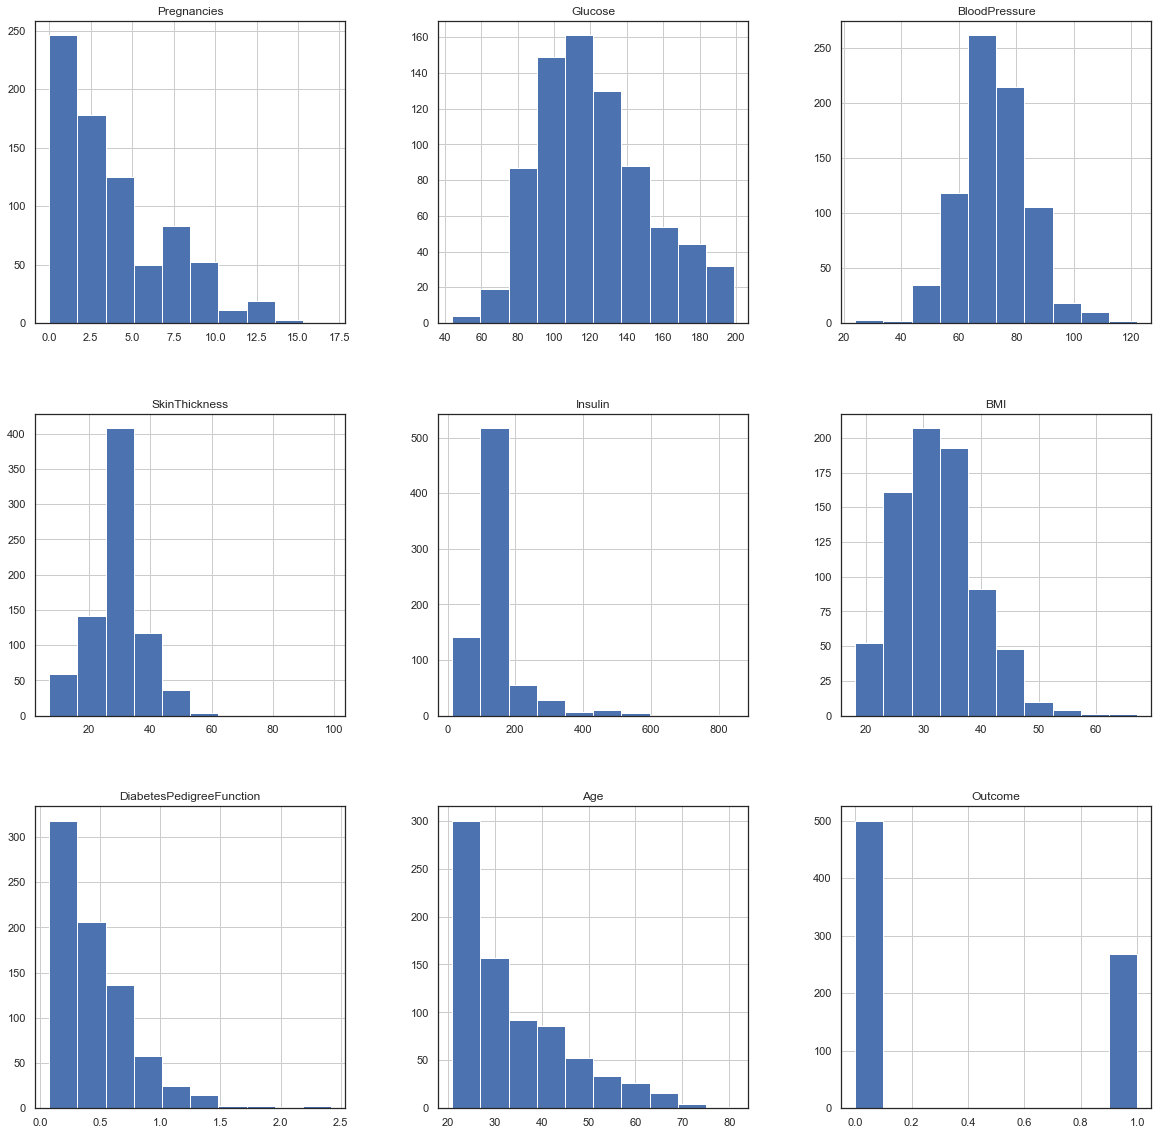

In [10]:
p = df2.hist(figsize = (20,20))

## Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df2.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [13]:
y = df2.Outcome

In [30]:
X.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

In [31]:
y.dtypes

dtype('int64')

## Test-Train Split with Stratification to make sure Test sample has same distribution of Y values as full population

In [14]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

## KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,100):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
## score that comes from testing on the same datapoints that 

In [16]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [17]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.97402597402598 % and k = [18, 22, 23, 24, 26, 27, 28]


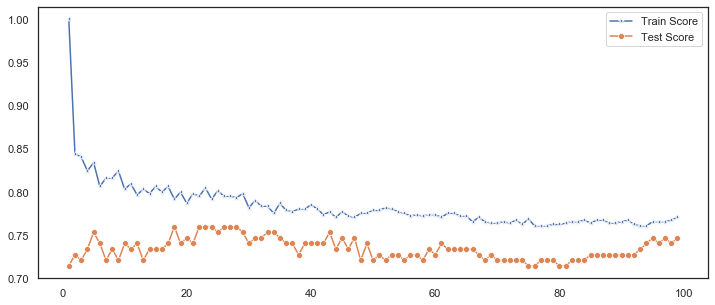

In [18]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,100),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,100),test_scores,marker='o',label='Test Score')

In [19]:
#finding error rates
error_test = [1-x for x in test_scores]
error_train = [1-x for x in train_scores]

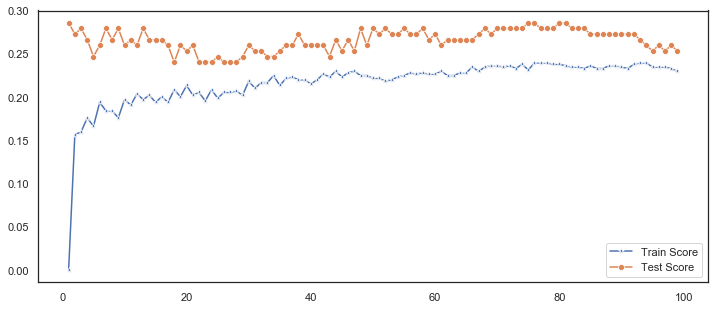

In [22]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,100),error_train,marker='*',label='Train Score')
p = sns.lineplot(range(1,100),error_test,marker='o',label='Test Score')

In [42]:
k_ideal = np.sqrt(768)

In [43]:
print(k_ideal)

27.712812921102035


In [35]:
#Setup a knn classifier with k neighbors with SQRT of N we rounded down here but 28 also has Ideal number
knn = KNeighborsClassifier(27)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7597402597402597

In [38]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,87,13,100
1,24,30,54
All,111,43,154


## Random Forrest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Confusion matrix : \n' + str(confusion_matrix(y_test, y_pred)))
print('Accuracy score : \n' + str(accuracy_score(y_test, y_pred)))

Confusion matrix : 
[[87 13]
 [24 30]]
Accuracy score : 
0.7597402597402597


## LDA

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

model = lda.fit(X_train, y_train)
pred = model.predict(X_test)

print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))

0.7012987012987013
[[82 28]
 [18 26]]


## QDA

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

model2 = qda.fit(X_train, y_train)
pred2 = model2.predict(X_test)

print(accuracy_score(pred2, y_test))
print(confusion_matrix(pred2, y_test))

0.7012987012987013
[[78 24]
 [22 30]]
